In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Projects/Nuclear Physics GPT/Feature Engineering/nuclear_physics_complete_df.csv', index_col=0).reset_index(drop=True)

df.head()

,Protons,Neutrons,Atomic Weight,Mass Excess,Binding Energy,Half-life,Half-life Magnitude,Half-life Time,Artificial,N-Z,...,Distance To Magic Number,Last Shell Filled,Last Shell Fill Ratio,Last Orbital Label Encoded (Complex),Last Orbital Label Encoded (Simple),Last Principal Quantum Number,Last Azimuthal Quantum Number Encoded,Even Z,Even N,Even N-Z
0,1,0,1.007825,7.288970,0.000000,2.486929e+62,62.0,8.000000e+00,0,-1,...,-1,0,0.5,10,1,1,0,1,0,1
1,1,1,2.014102,13.135722,1.112283,2.486929e+62,62.0,8.000000e+00,0,0,...,-1,0,0.5,10,1,1,0,1,1,3
2,1,2,3.016049,14.949806,2.827266,3.885728e+08,8.0,7.019868e+00,0,1,...,-1,0,0.5,10,1,1,0,1,0,1
3,1,3,4.027806,25.901518,1.400351,9.917391e-23,-23.0,9.917391e-17,0,2,...,-1,0,0.5,10,1,1,0,1,1,3
4,1,4,5.035311,32.892440,1.336360,8.003509e-23,-23.0,8.003509e-17,0,3,...,-1,0,0.5,10,1,1,0,1,0,1


In [3]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

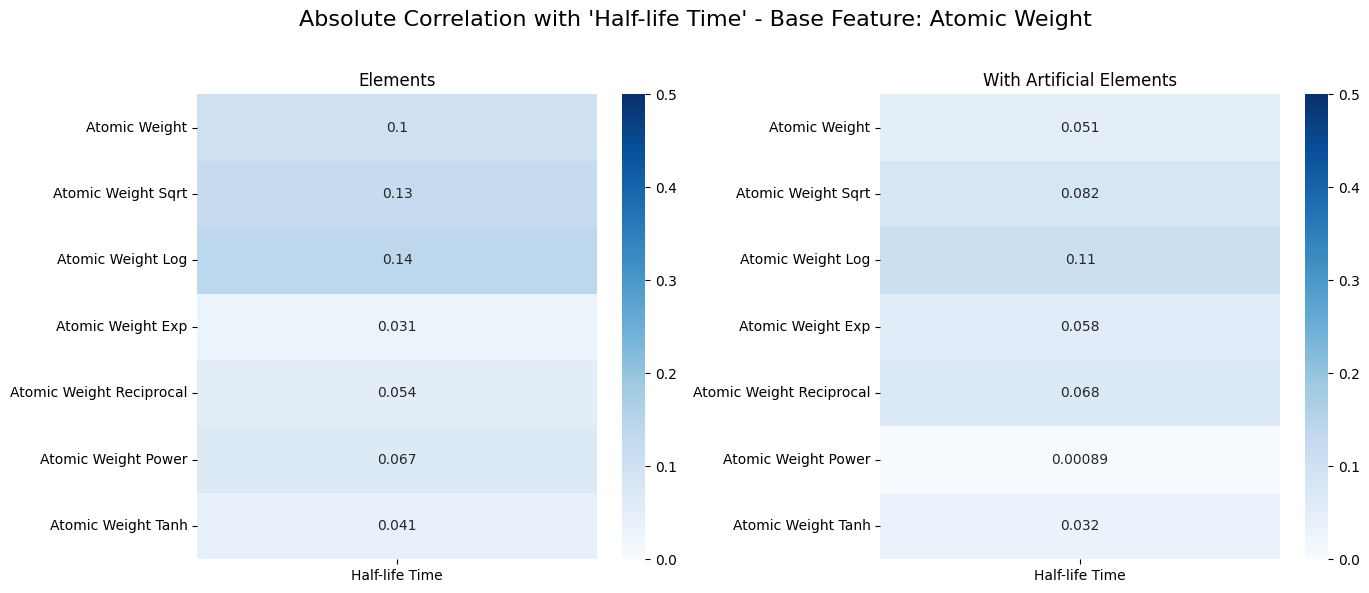

In [4]:
# Complete and cleaned-up code to generate the correlation heatmaps
base_feature = 'Atomic Weight'

def format_feature_name(name):
    name = '/'.join(word.title() for word in name.split('/'))
    name = ' '.join(word.title() for word in name.split('_'))
    return ' '.join(word.title() for word in name.split(' '))


# Update the df_correlation DataFrame to include only the base feature and its transformations
transformation_columns = [col for col in df.columns if col.startswith(f"{base_feature}_")]
features_to_correlate = [base_feature] + transformation_columns + ['Half-life Time']
df_correlation = df[features_to_correlate]

# Recalculate the absolute value of the correlation matrix including all elements
abs_corr_matrix_all = df_correlation.corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0)

# Recalculate the absolute value of the correlation matrix excluding artificial elements
abs_corr_matrix_non_artificial = df_correlation[df['Artificial'] == 0].corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0)

# Rename the index to formatted feature names
abs_corr_matrix_all.index = abs_corr_matrix_all.index.map(format_feature_name)
abs_corr_matrix_non_artificial.index = abs_corr_matrix_non_artificial.index.map(format_feature_name)

vmax_color_scale = 0.5
cmap = sns.color_palette("Blues", as_cmap=True)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(abs_corr_matrix_non_artificial, annot=True, cmap=cmap, ax=ax[0], vmin=0, vmax=vmax_color_scale)
sns.heatmap(abs_corr_matrix_all, annot=True, cmap=cmap, ax=ax[1], vmin=0, vmax=vmax_color_scale)


# Formatting titles
ax[0].set_title(f"Elements")
ax[1].set_title(f"With Artificial Elements")
fig.suptitle(f"Absolute Correlation with 'Half-life Time' - Base Feature: {format_feature_name(base_feature)}", fontsize=16)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



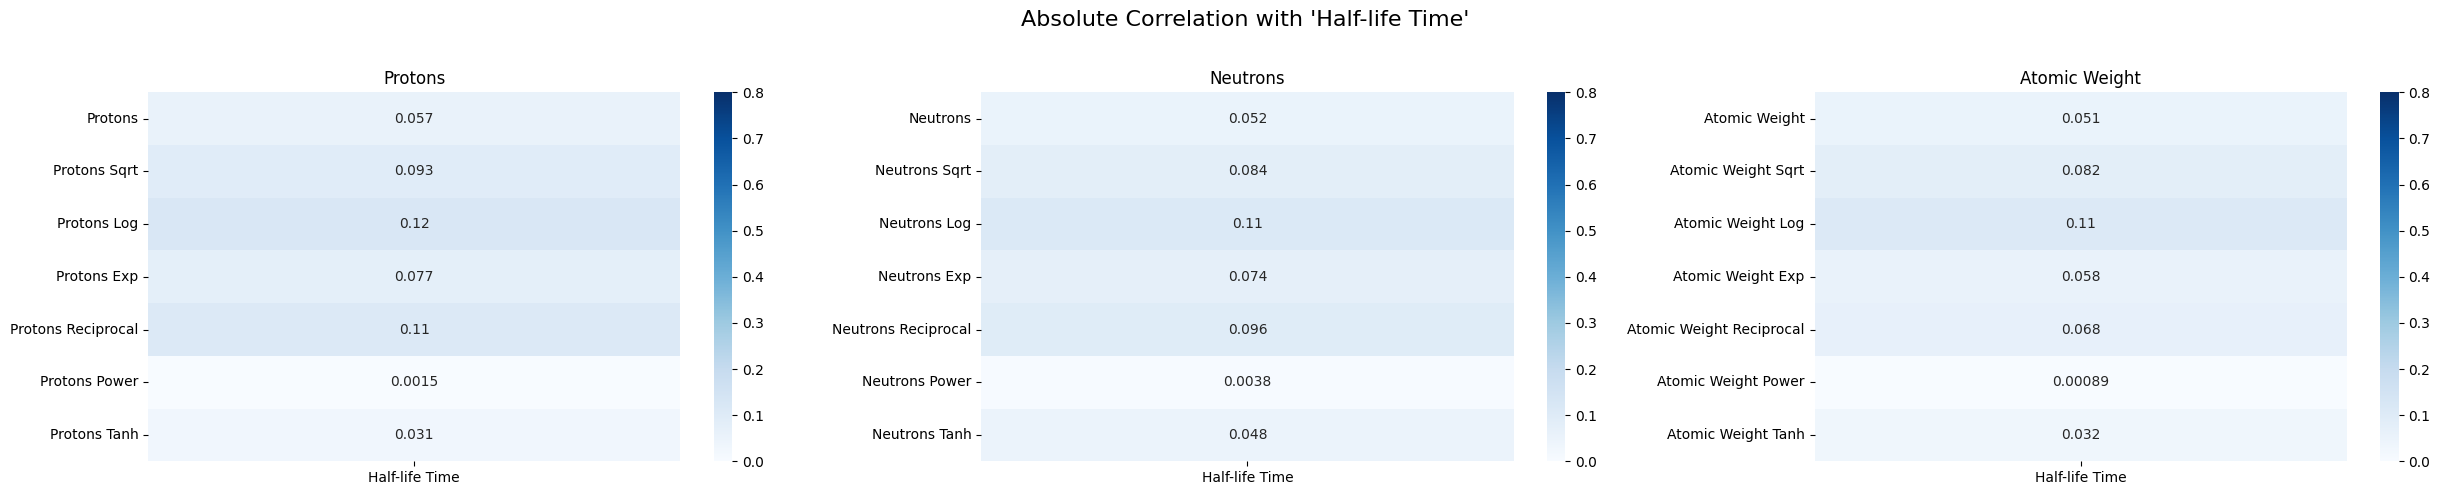

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def format_feature_name(name):
    name = '/'.join(word.title() for word in name.split('/'))
    name = ' '.join(word.title() for word in name.split('_'))
    return ' '.join(word.title() for word in name.split(' '))

base_features = ['Protons', 'Neutrons', 'Atomic Weight', ]

# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

for i, base_feature in enumerate(base_features):
    # Update the df_correlation DataFrame to include only the base feature and its transformations
    transformation_columns = [col for col in df.columns if col.startswith(f"{base_feature}_")]
    features_to_correlate = [base_feature] + transformation_columns + ['Half-life Time']
    df_correlation = df[features_to_correlate]

    # Recalculate the absolute value of the correlation matrix including all elements
    abs_corr_matrix_all = df_correlation.corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0)

    # Rename the index to formatted feature names
    abs_corr_matrix_all.index = abs_corr_matrix_all.index.map(format_feature_name)

    vmax_color_scale = 0.8
    cmap = sns.color_palette("Blues", as_cmap=True)

    # Plotting
    sns.heatmap(abs_corr_matrix_all, annot=True, cmap=cmap, ax=axes[i], vmin=0, vmax=vmax_color_scale)

    # Formatting titles
    axes[i].set_title(f"{format_feature_name(base_feature)}")

# Layout adjustment and main title
fig.suptitle(f"Absolute Correlation with 'Half-life Time'", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


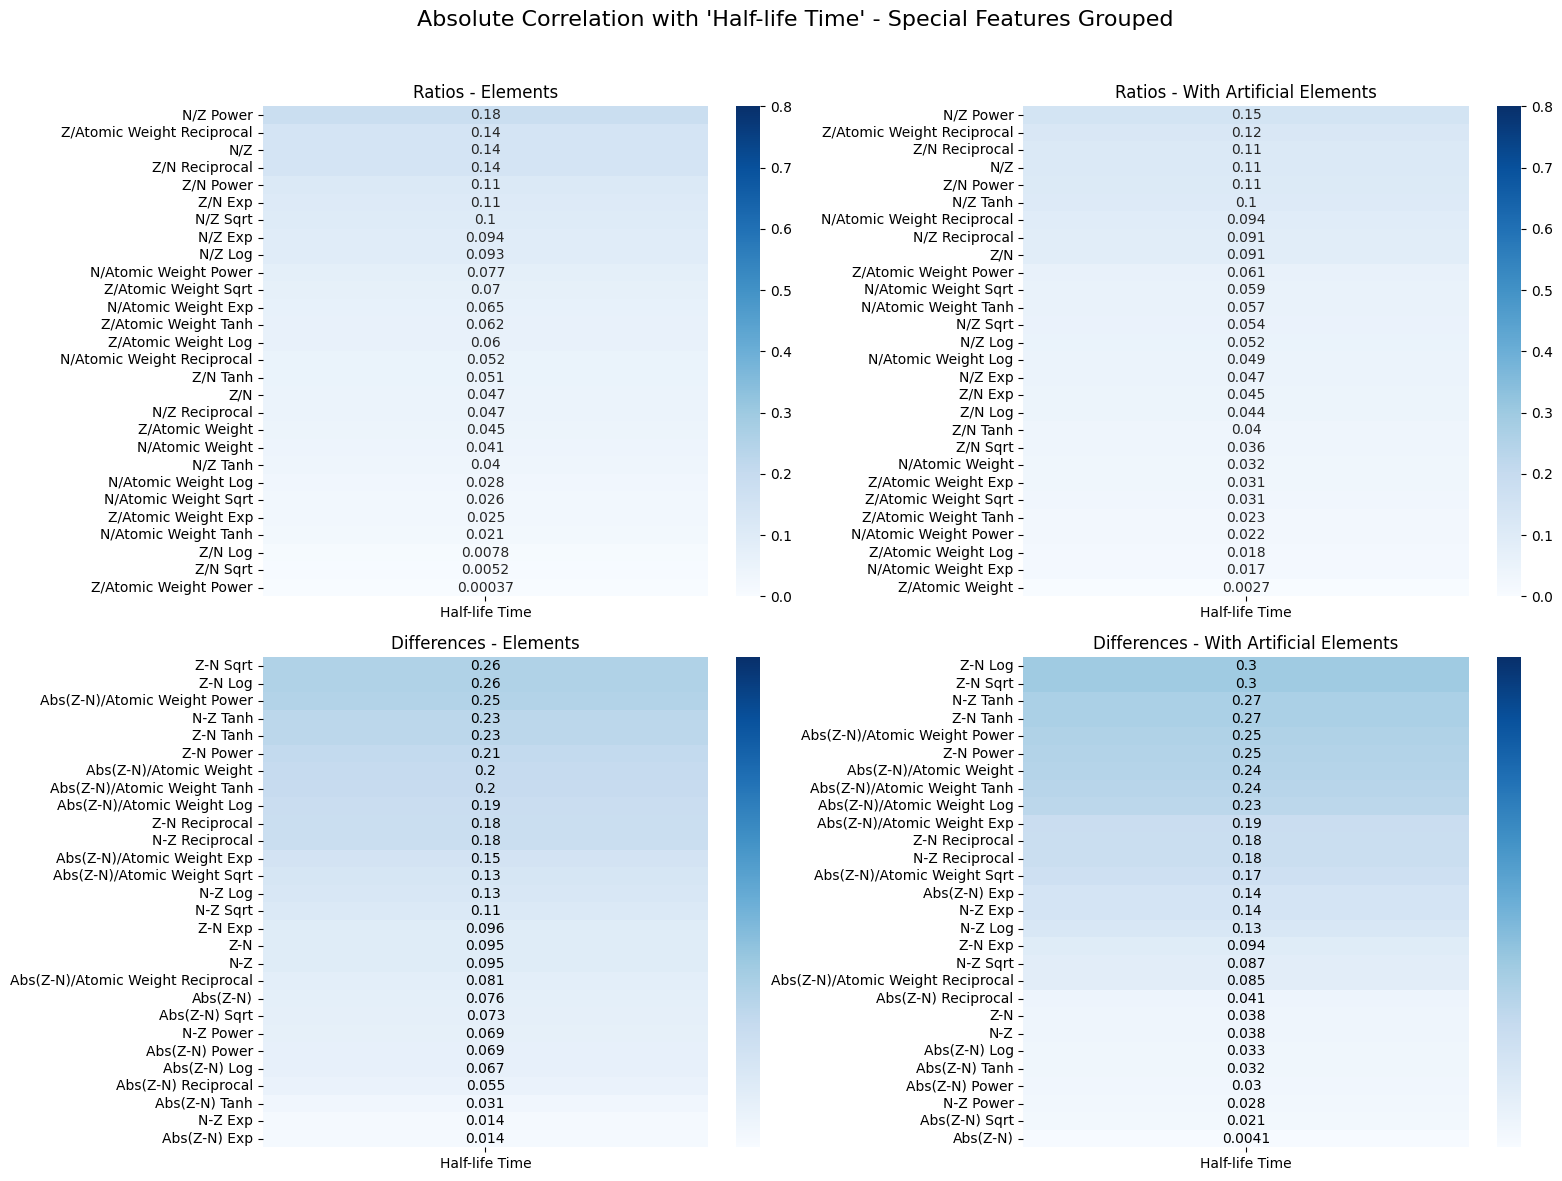

In [6]:
# Separate the special features into those involving ratios and those involving differences
features_ratios = ['N/Z', 'Z/N', 'Z/Atomic Weight', 'N/Atomic Weight']
features_differences = ['Z-N', 'N-Z', 'Abs(Z-N)', 'Abs(Z-N)/Atomic Weight']

# Identify their transformations
transformation_columns_ratios = [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in features_ratios)]
transformation_columns_differences = [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in features_differences)]

# Create dataframes for each category
features_to_correlate_ratios = features_ratios + transformation_columns_ratios + ['Half-life Time']
features_to_correlate_differences = features_differences + transformation_columns_differences + ['Half-life Time']
df_correlation_ratios = df[features_to_correlate_ratios]
df_correlation_differences = df[features_to_correlate_differences]

# Calculate the absolute correlation matrices
abs_corr_matrix_all_ratios = df_correlation_ratios.corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0).sort_values('Half-life Time', ascending=False)
abs_corr_matrix_non_artificial_ratios = df_correlation_ratios[df['Artificial'] == 0].corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0).sort_values('Half-life Time', ascending=False)

abs_corr_matrix_all_differences = df_correlation_differences.corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0).sort_values('Half-life Time', ascending=False)
abs_corr_matrix_non_artificial_differences = df_correlation_differences[df['Artificial'] == 0].corr().abs()[['Half-life Time']].drop('Half-life Time', axis=0).sort_values('Half-life Time', ascending=False)


# Rename the index to formatted feature names
abs_corr_matrix_all_ratios.index = abs_corr_matrix_all_ratios.index.map(format_feature_name)
abs_corr_matrix_non_artificial_ratios.index = abs_corr_matrix_non_artificial_ratios.index.map(format_feature_name)
abs_corr_matrix_all_differences.index = abs_corr_matrix_all_differences.index.map(format_feature_name)
abs_corr_matrix_non_artificial_differences.index = abs_corr_matrix_non_artificial_differences.index.map(format_feature_name)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(abs_corr_matrix_non_artificial_ratios, annot=True, cmap=cmap, ax=ax[0, 0], vmin=0, vmax=vmax_color_scale)
sns.heatmap(abs_corr_matrix_all_ratios, annot=True, cmap=cmap, ax=ax[0, 1], vmin=0, vmax=vmax_color_scale)
sns.heatmap(abs_corr_matrix_non_artificial_differences, annot=True, cmap=cmap, ax=ax[1, 0], vmin=0, vmax=vmax_color_scale, cbar_kws={'ticks': [], 'label': ''}, annot_kws={"color": 'black'})
sns.heatmap(abs_corr_matrix_all_differences, annot=True, cmap=cmap, ax=ax[1, 1], vmin=0, vmax=vmax_color_scale, cbar_kws={'ticks': [], 'label': ''}, annot_kws={"color": 'black'})

# Formatting titles
ax[0, 0].set_title(f"Ratios - Elements")
ax[0, 1].set_title(f"Ratios - With Artificial Elements")
ax[1, 0].set_title(f"Differences - Elements")
ax[1, 1].set_title(f"Differences - With Artificial Elements")

ax[0, 0].set_yticklabels(abs_corr_matrix_non_artificial_ratios.index)
ax[0, 1].set_yticklabels(abs_corr_matrix_all_ratios.index)
ax[1, 0].set_yticklabels(abs_corr_matrix_non_artificial_differences.index)
ax[1, 1].set_yticklabels(abs_corr_matrix_all_differences.index)


fig.suptitle(f"Absolute Correlation with 'Half-life Time' - Special Features Grouped", fontsize=16)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



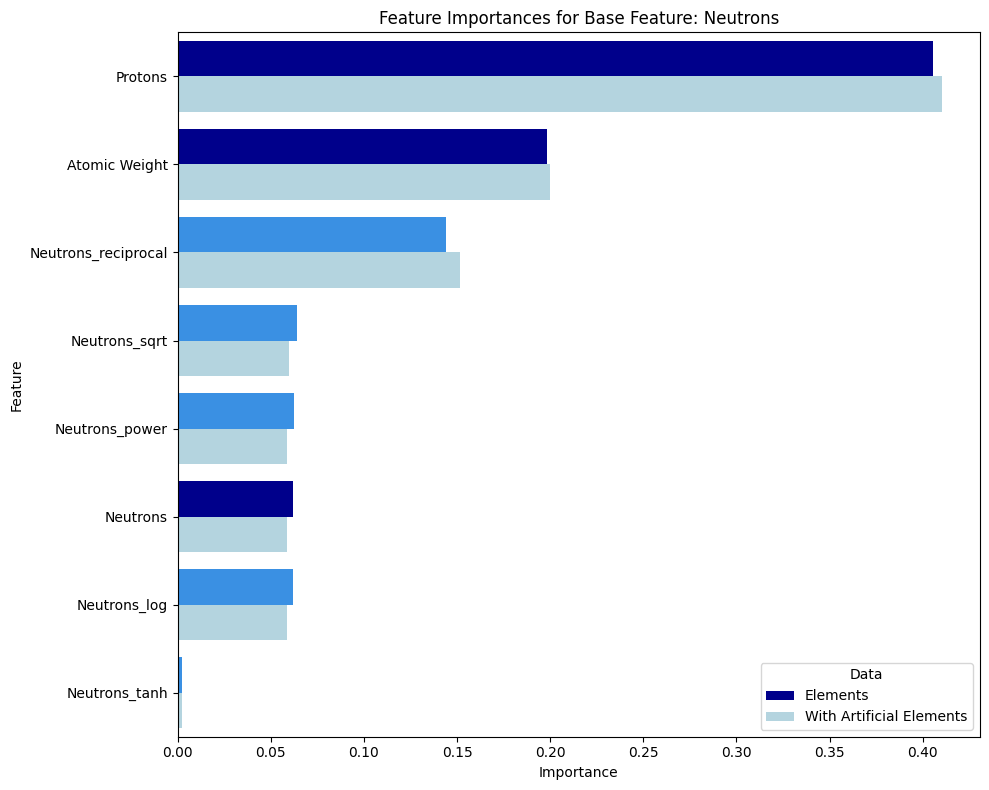

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

base_feature = 'Neutrons'
base_features = ['Protons', 'Neutrons', 'Atomic Weight']

def calculate_and_sort_importance(base_feature, df, label):
    transformation_columns = [col for col in df.columns if col.startswith(f"{base_feature}_") and 'exp' not in col]
    all_features = base_features + transformation_columns
    X = df[all_features]
    y = df['Half-life Time']

    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X, y)

    return pd.DataFrame({
        'Feature': all_features,
        'Importance': rf.feature_importances_,
        'Label': label
    }).sort_values('Importance', ascending=False)

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate feature importances
df_non_artificial = df[df['Artificial'] == 0]  # Assuming your dataframe has a column named 'Artifical'
df_importance_non_artificial = calculate_and_sort_importance(base_feature, df_non_artificial, 'Elements')
df_importance_all = calculate_and_sort_importance(base_feature, df, 'With Artificial Elements')

# Combine and sort
df_combined = pd.concat([df_importance_non_artificial, df_importance_all])
df_combined = df_combined.reset_index(drop=True)

# Plot
sns.barplot(x='Importance', y='Feature', hue='Label', data=df_combined, ax=ax, hue_order=['Elements', 'With Artificial Elements'], palette={"Elements": "dodgerblue", "With Artificial Elements": "lightblue"})

# Change color for base features
for i, patch in enumerate(ax.patches):
    feature = df_combined['Feature'].iloc[i % len(df_combined['Feature'].unique())]
    label = df_combined['Label'].iloc[i]
    if feature in base_features:
      if label == 'Elements':
        patch.set_facecolor('darkblue')

# Add title and legend
ax.set_title(f'Feature Importances for Base Feature: {base_feature}')
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title='Data', loc='lower right')

plt.tight_layout()
plt.show()


df['N-Z'] = df['Neutrons'] - df['Protons']
df['Z-N'] = df['Protons'] - df['Neutrons']

df['Abs(Z-N)'] = abs(df['Protons'] - df['Neutrons'])

df['N/Z'] = np.where(df['Protons'] > 0, df['Neutrons'] / df['Protons'], 0)
df['Z/N'] = np.where(df['Neutrons'] > 0, df['Protons'] / df['Neutrons'], 0)

df['Z/Atomic Weight'] = df['Protons'] / df['Atomic Weight']
df['N/Atomic Weight'] = df['Neutrons'] / df['Atomic Weight']

df['Abs(Z-N)/Atomic Weight'] = df['Abs(Z-N)'] / df['Atomic Weight']

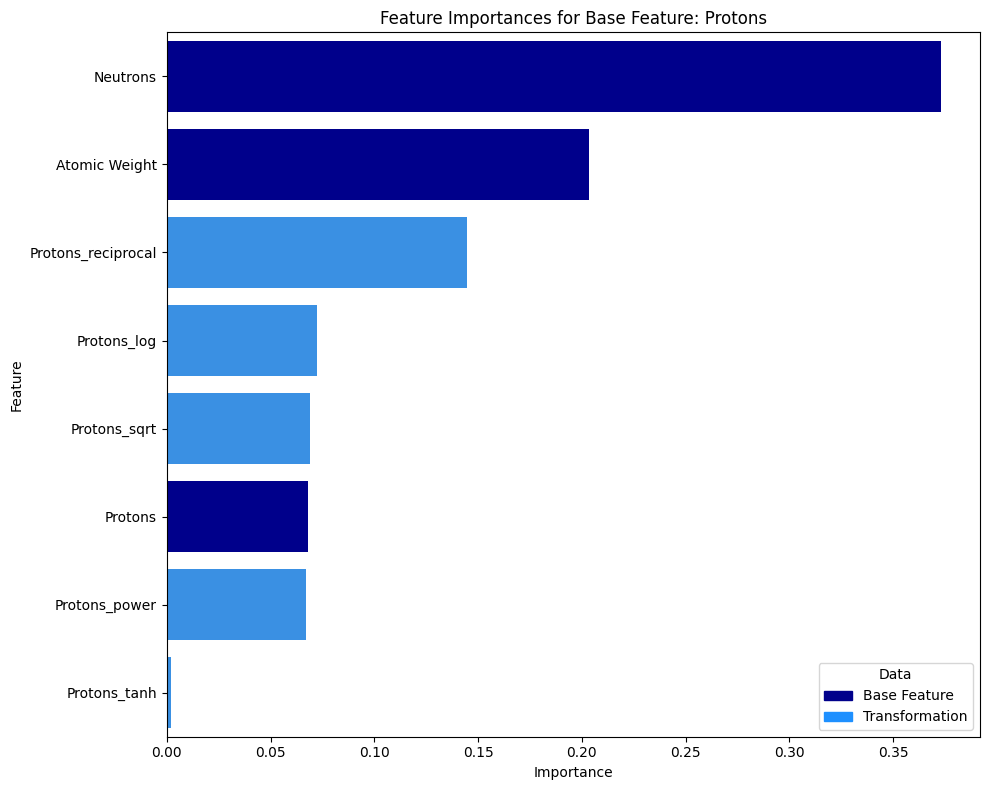

In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

base_feature = 'Protons'
base_features = ['Protons', 'Neutrons', 'Atomic Weight']

def calculate_and_sort_importance(base_feature, df):
    transformation_columns = [col for col in df.columns if col.startswith(f"{base_feature}_") and 'exp' not in col]
    all_features = base_features + transformation_columns
    X = df[all_features]
    y = df['Half-life Time']

    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X, y)

    return pd.DataFrame({
        'Feature': all_features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate feature importances
df_non_artificial = df[df['Artificial'] == 0]  # Assuming your dataframe has a column named 'Artifical'
df_importance = calculate_and_sort_importance(base_feature, df_non_artificial)

# Plot
sns.barplot(x='Importance', y='Feature', data=df_importance, ax=ax, color='dodgerblue')

# Change color for base features
for i, patch in enumerate(ax.patches):
    feature = df_importance['Feature'].iloc[i]
    if feature in base_features:
        patch.set_facecolor('darkblue')

# Custom legend
legend_labels = [Patch(facecolor='darkblue', edgecolor='darkblue', label='Base Feature'),
                 Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='Transformation'),]

ax.legend(handles=legend_labels, title='Data', loc='lower right')

# Add title
ax.set_title(f'Feature Importances for Base Feature: {base_feature}')

plt.tight_layout()
plt.show()



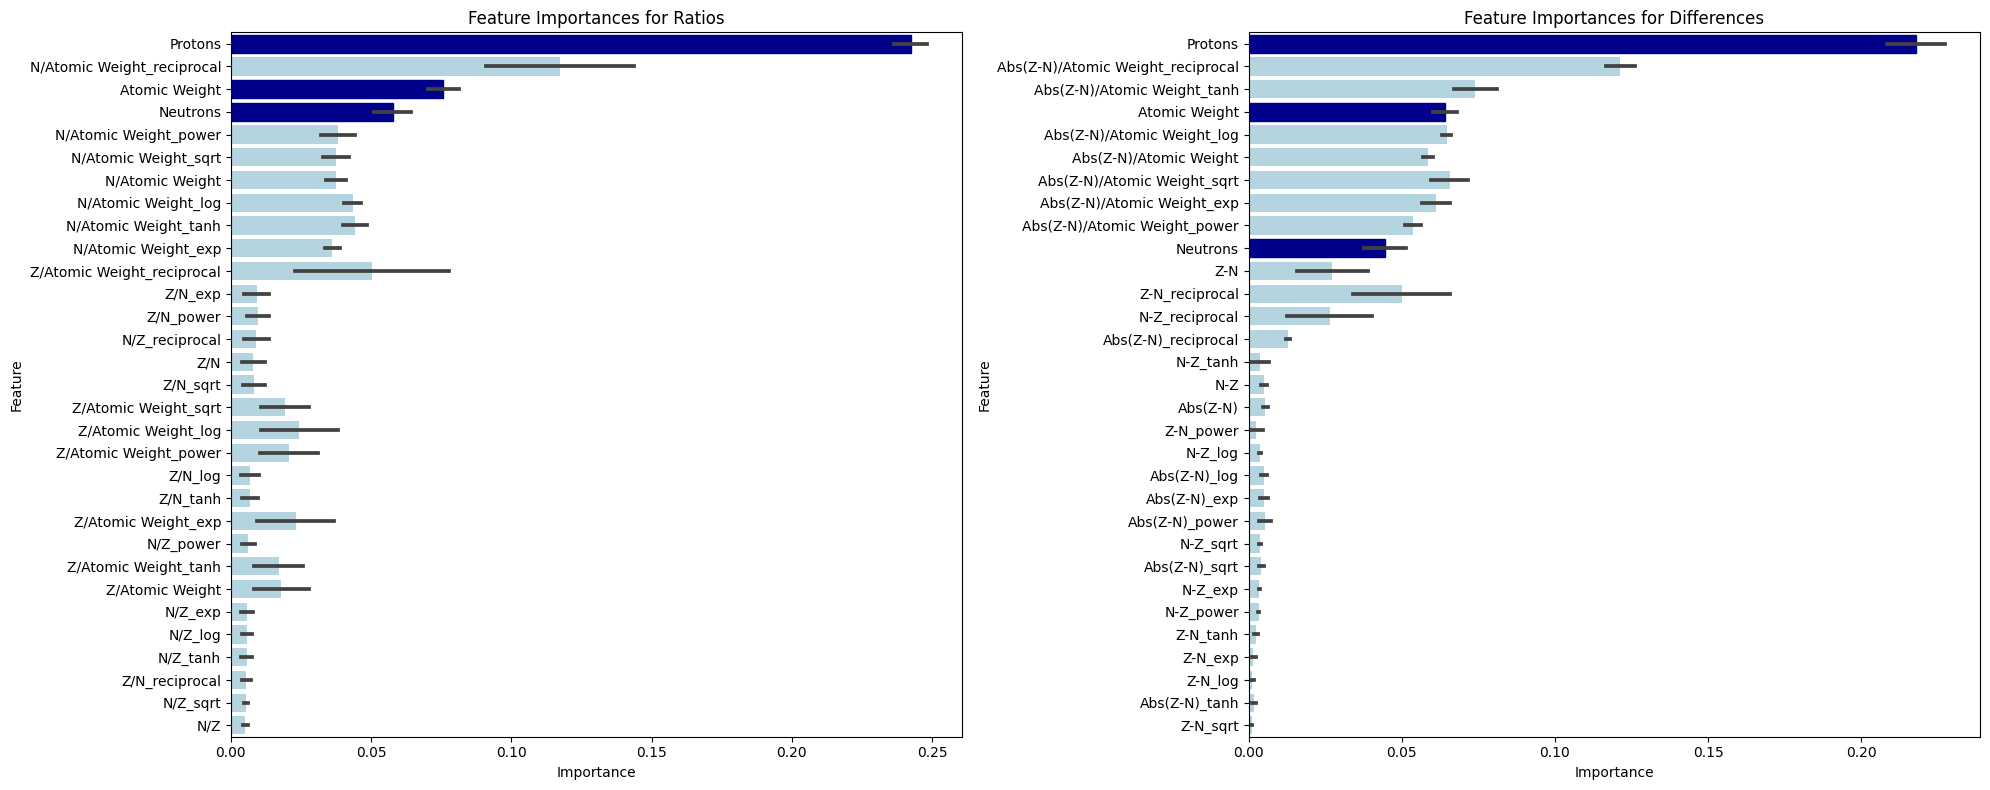

In [13]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_ratios = ['N/Z', 'Z/N', 'Z/Atomic Weight', 'N/Atomic Weight']
features_differences = ['Z-N', 'N-Z', 'Abs(Z-N)', 'Abs(Z-N)/Atomic Weight']
base_features = ['Protons', 'Neutrons', 'Atomic Weight']

def calculate_and_sort_importance(features, df, label):
    transformation_columns = [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in features)]
    X = df[base_features + features + transformation_columns]
    y = df['Half-life Time']

    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X, y)

    return pd.DataFrame({
        'Feature': base_features + features + transformation_columns,
        'Importance': rf.feature_importances_,
        'Label': label
    }).sort_values('Importance', ascending=False)  # Sorted in descending order

# Initialize figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

def plot_sorted_features(features, df, df_non_artificial, ax, title, color):
    df_importance_non_artificial = calculate_and_sort_importance(features, df_non_artificial, 'Known Data')
    df_importance_all = calculate_and_sort_importance(features, df, 'With \'Border\' Elements')
    df_combined = pd.concat([df_importance_non_artificial, df_importance_all])
    sns.barplot(x='Importance', y='Feature', color=color, data=df_combined, ax=ax)
    ax.set_title(title)

    # Change color for base features
    for i, feature in enumerate(df_combined['Feature'].unique()):
        if feature in base_features:
            ax.patches[i].set_color('darkblue')

plot_sorted_features(features_ratios, df, df[df['Artificial'] == 0], axes[0], 'Feature Importances for Ratios', 'lightblue')
plot_sorted_features(features_differences, df, df[df['Artificial'] == 0], axes[1], 'Feature Importances for Differences', 'lightblue')

plt.tight_layout()
plt.show()


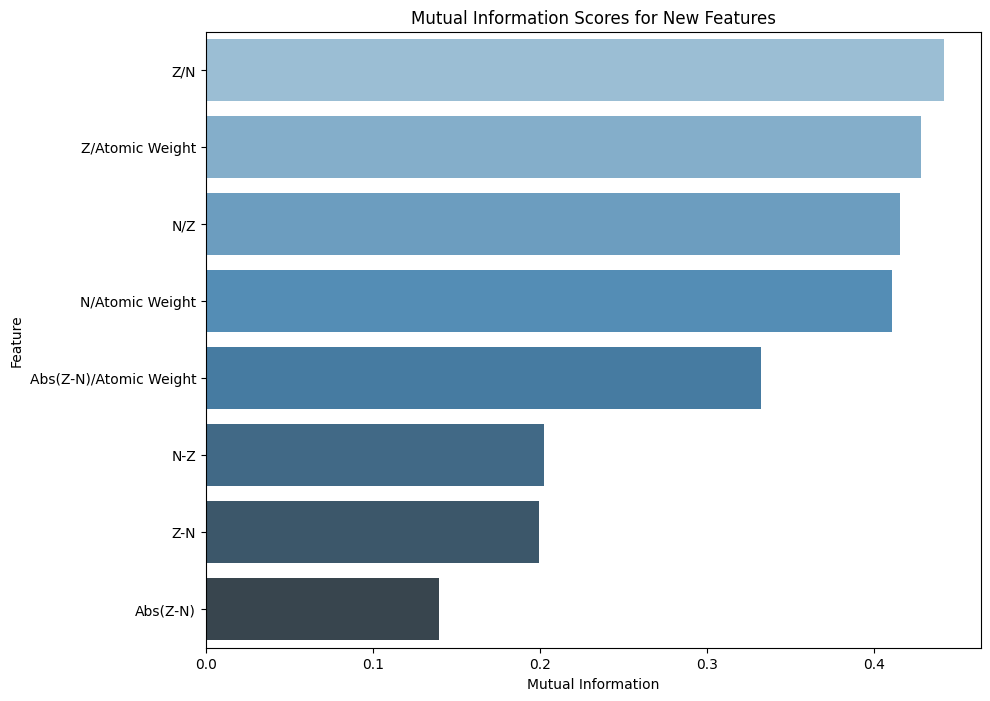

,Feature,Mutual Information
4,Z/N,0.442185
5,Z/Atomic Weight,0.428588
3,N/Z,0.415825
6,N/Atomic Weight,0.411296
7,Abs(Z-N)/Atomic Weight,0.332817
0,N-Z,0.202256
1,Z-N,0.199488
2,Abs(Z-N),0.139555


In [24]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
df['N-Z'] = df['Neutrons'] - df['Protons']
df['Z-N'] = df['Protons'] - df['Neutrons']

df['Abs(Z-N)'] = abs(df['Protons'] - df['Neutrons'])

df['N/Z'] = np.where(df['Protons'] > 0, df['Neutrons'] / df['Protons'], 0)
df['Z/N'] = np.where(df['Neutrons'] > 0, df['Protons'] / df['Neutrons'], 0)

df['Z/Atomic Weight'] = df['Protons'] / df['Atomic Weight']
df['N/Atomic Weight'] = df['Neutrons'] / df['Atomic Weight']

df['Abs(Z-N)/Atomic Weight'] = df['Abs(Z-N)'] / df['Atomic Weight']

# Specify the base feature and its transformations
base_feature = 'Atomic Weight'
transformation_columns = [col for col in df.columns if col in ['N-Z','Z-N','Abs(Z-N)','N/Z','Z/N','Z/Atomic Weight', 'N/Atomic Weight', 'Abs(Z-N)/Atomic Weight']]

# Features and target variable
features = transformation_columns
X = df[features]
y = df['Half-life Time']

# Calculate Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': features,
    'Mutual Information': mi_scores
}).sort_values('Mutual Information', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Blues_d')
plt.title(f'Mutual Information Scores for New Features')
plt.show()

mi_scores_df


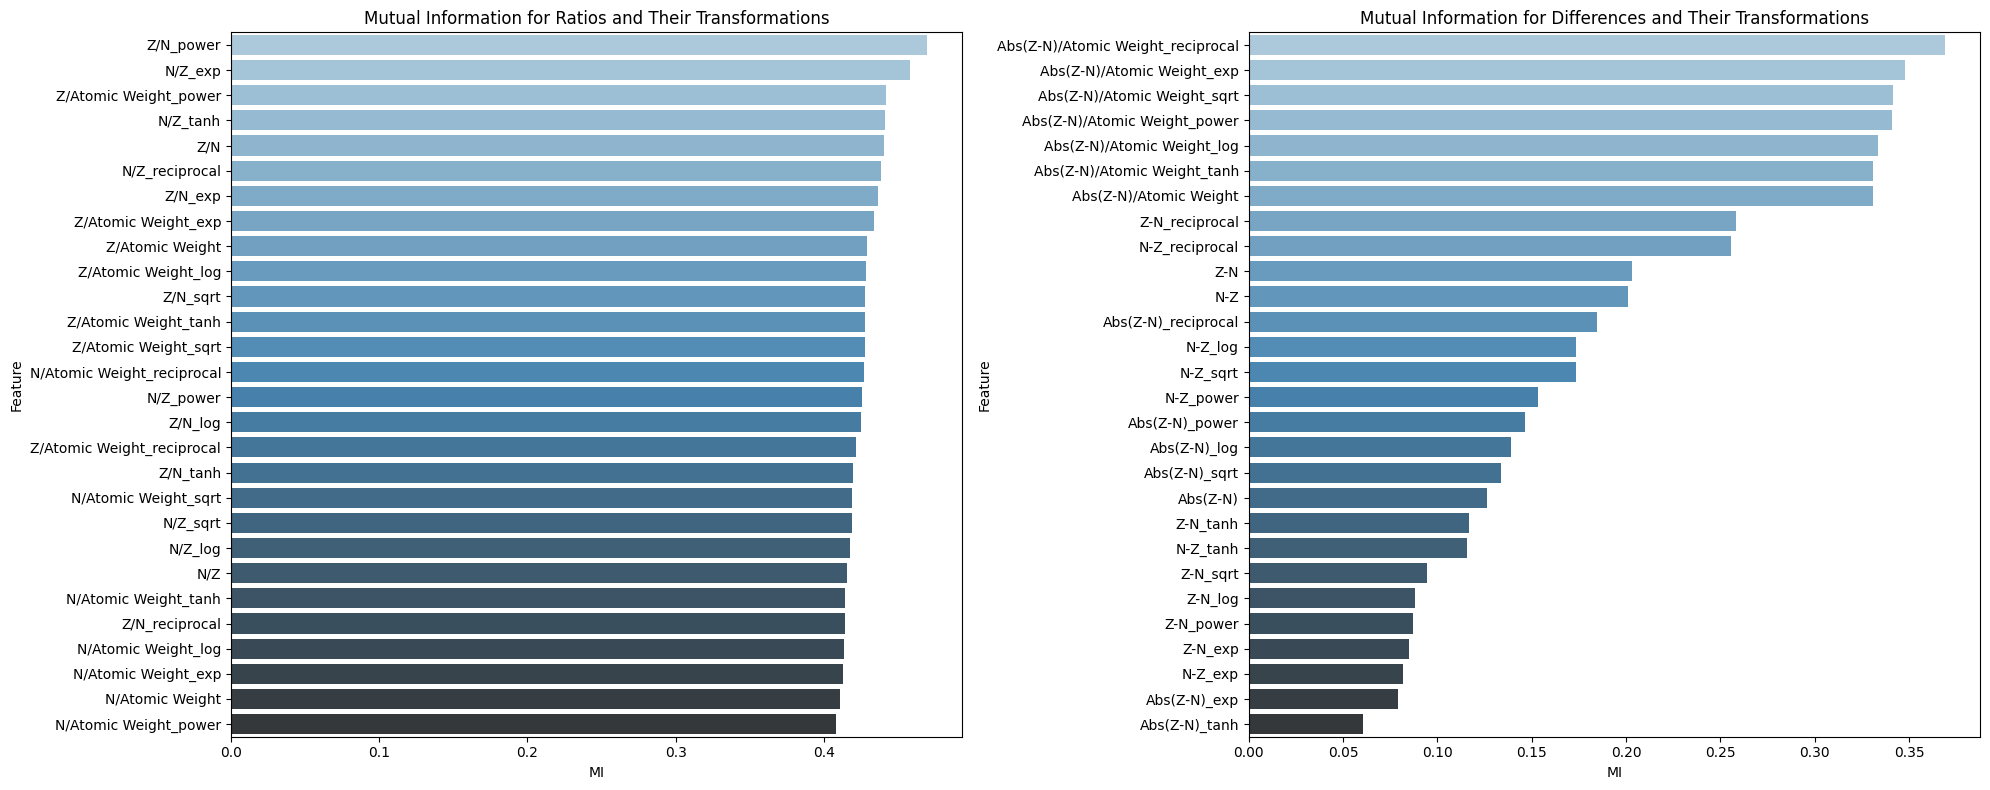

In [10]:
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Features groups
features_ratios = ['N/Z', 'Z/N', 'Z/Atomic Weight', 'N/Atomic Weight']
features_differences = ['Z-N', 'N-Z', 'Abs(Z-N)', 'Abs(Z-N)/Atomic Weight']

# Identify their transformations
transformation_columns_ratios = [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in features_ratios)]
transformation_columns_differences = [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in features_differences)]

# Prepare data
X_ratios = df[features_ratios + transformation_columns_ratios]
X_differences = df[features_differences + transformation_columns_differences]
y = df['Half-life Time']

# Calculate Mutual Information for each group
mi_ratios = mutual_info_regression(X_ratios, y, random_state=42)
mi_differences = mutual_info_regression(X_differences, y, random_state=42)

# Prepare data for visualization
df_mi_ratios = pd.DataFrame({
    'Feature': X_ratios.columns,
    'MI': mi_ratios
}).sort_values('MI', ascending=False)

df_mi_differences = pd.DataFrame({
    'Feature': X_differences.columns,
    'MI': mi_differences
}).sort_values('MI', ascending=False)

# Initialize figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot MI for ratios
sns.barplot(x='MI', y='Feature', data=df_mi_ratios, ax=axes[0], palette='Blues_d')
axes[0].set_title('Mutual Information for Ratios and Their Transformations')

# Plot MI for differences
sns.barplot(x='MI', y='Feature', data=df_mi_differences, ax=axes[1], palette='Blues_d')
axes[1].set_title('Mutual Information for Differences and Their Transformations')

plt.tight_layout()
plt.show()


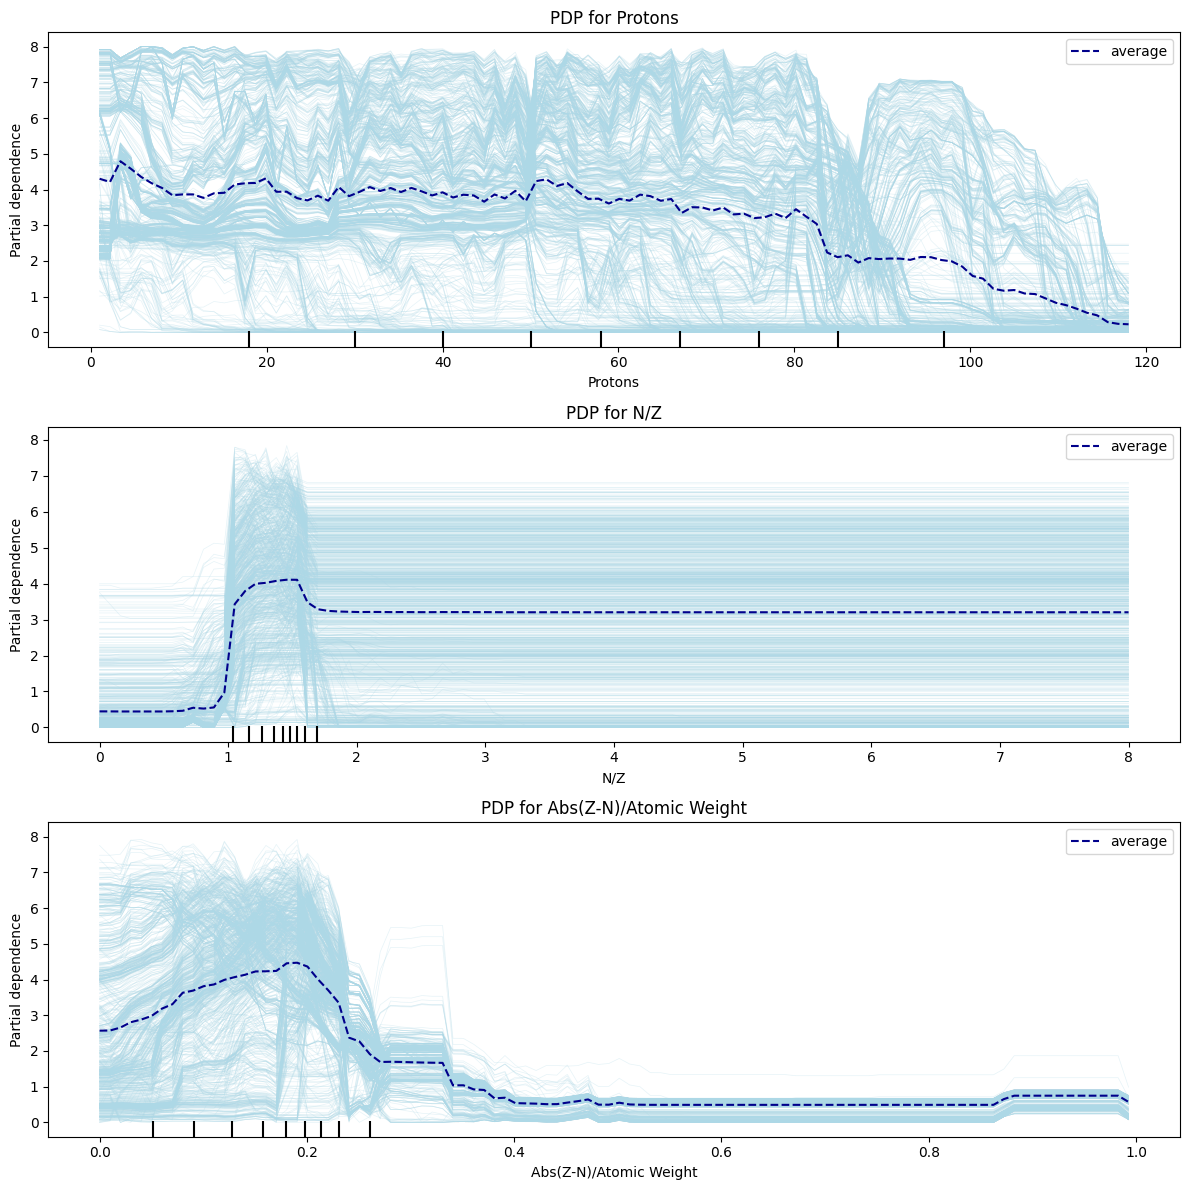

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# Define the list of base features
base_features = ['Protons', 'N/Z', 'Abs(Z-N)/Atomic Weight']

# Train Random Forest model for all elements (including artificial)
all_features = base_features + [col for col in df.columns if any(col.startswith(f"{feature}_") for feature in base_features) and 'exp' not in col]
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(df[base_features], df['Half-life Time'])

# Create a subplot layout with one row per base feature
fig, axes = plt.subplots(len(base_features), 1, figsize=(12, 4 * len(base_features)))

# Generate Partial Dependence Plots for all base features and their transformations
for i, base_feature in enumerate(base_features):
    # Identify features related to the current base feature
    related_features = [base_feature] #+ [col for col in df.columns if col.startswith(f"{base_feature}_") and 'exp' not in col]

    # Get the axis for this base feature
    ax = axes[i]

    # Generate PDPs for the related feature
    PartialDependenceDisplay.from_estimator(rf_model, df[base_features], [base_feature], ax=ax, kind='both',
                                            line_kw={"color": "darkblue", "alpha": 1},
                                            ice_lines_kw={'color':'lightblue', "alpha": .3},
                                            percentiles=(0, 1))
    ax.set_title(f'PDP for {base_feature}')

plt.tight_layout()
plt.show()





In [ ]:
# Proton Features to Keep: log, Reciprocal, Base
# Neutron Features to Keep: Recirpocal, Log, Power, Base
# Atomic Weight: Log, Reicrpocal, Power, Base
# Abs(Z-N)/AW: Recip, Base
# Z-N: Recirpocal, Log, Base
# Z/N: Power, Base

features_to_keep = ['Protons', 'Protons_log', 'Protons_reciprocal',
                    'Neutrons', 'Neutrons_log', 'Neutrons_reciprocal', 'Neutrons_power',
                    'Atomic Weight', 'Atomic Weight_log', 'Atomic Weight_reciprocal', 'Atomic Weight_power',
                    'Abs(Z-N)/Atomic Weight', 'Abs(Z-N)/Atomic Weight_reciprocal',
                    'Z-N', 'Z-N_log', 'Z-N_reciprocal',
                    'Z/N', 'Z/N_power']



<ipython-input-22-35d481efea3c>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Half-life Time', data=df, ax=ax, palette="Blues_d", ci="sd")
<ipython-input-22-35d481efea3c>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Half-life Time', data=df, ax=ax, palette="Blues_d", ci="sd")
<ipython-input-22-35d481efea3c>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Half-life Time', data=df, ax=ax, palette="Blues_d", ci="sd")


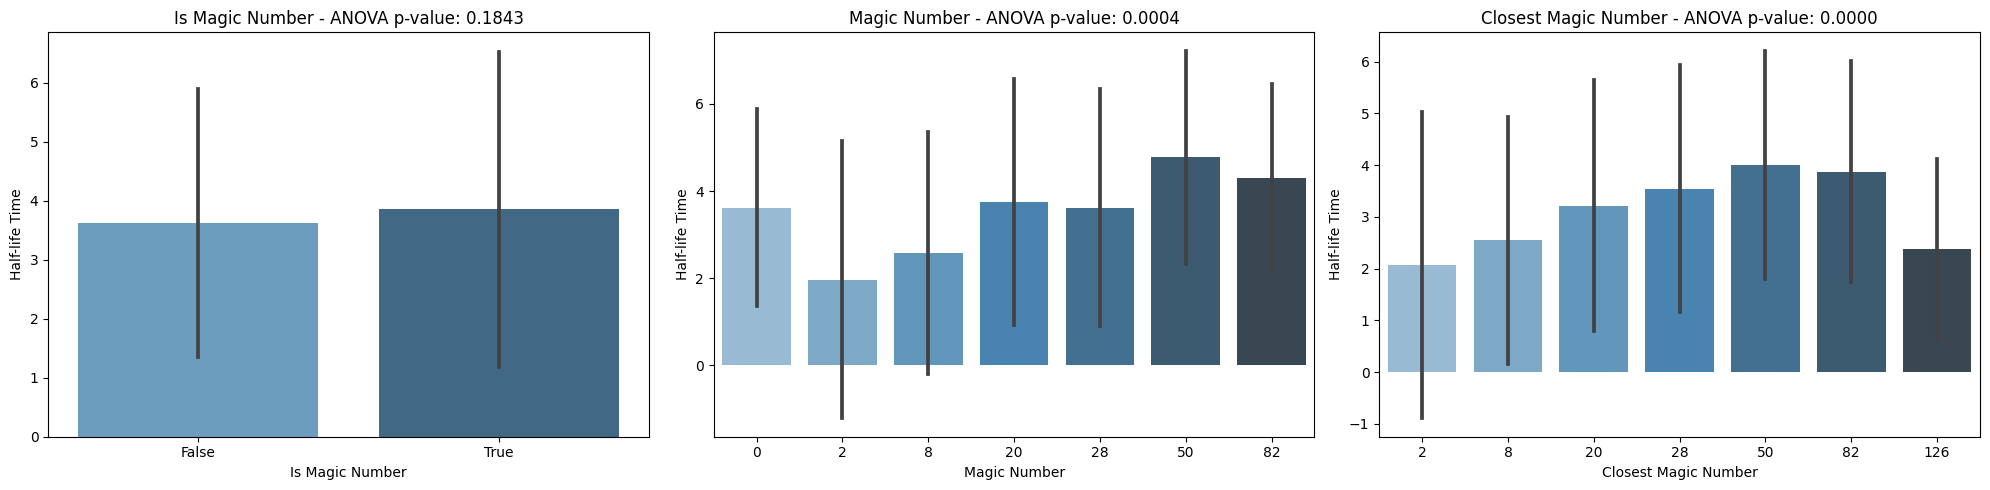

{'Is Magic Number': (1.76328717060388, 0.1842988681145584),
 'Magic Number': (4.141138340163897, 0.00037573765534281713),
 'Closest Magic Number': (32.88650610887605, 8.575515705947519e-39)}

In [ ]:
import scipy.stats as stats

# Select features for this specific analysis

#selected_features = ['Even Z', 'Even N', 'Even N-Z']
#selected_features = ['Last Shell Filled', 'Last Azimuthal Quantum Number Encoded',
                     #'Last Principal Quantum Number', 'Last Orbital Label Encoded (Simple)']
selected_features = ['Is Magic Number', 'Magic Number', 'Closest Magic Number']


# Initialize an empty dictionary to store ANOVA results
anova_results = {}

# Create a subplot layout
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

# Loop through each selected feature to perform ANOVA and plot Bar Charts
for i, feature in enumerate(selected_features):
    ax = axes[i]


    # Conduct ANOVA
    categories = df[feature].unique()
    samples = [df[df[feature] == cat]['Half-life Time'] for cat in categories]

    F, p_value = stats.f_oneway(*samples)
    anova_results[feature] = (F, p_value)

    # Create Bar Chart with Mean Target for Each Category
    sns.barplot(x=feature, y='Half-life Time', data=df, ax=ax, palette="Blues_d", ci="sd")
    ax.set_title(f"{feature} - ANOVA p-value: {p_value:.4f}")

plt.tight_layout()
plt.show()

anova_results


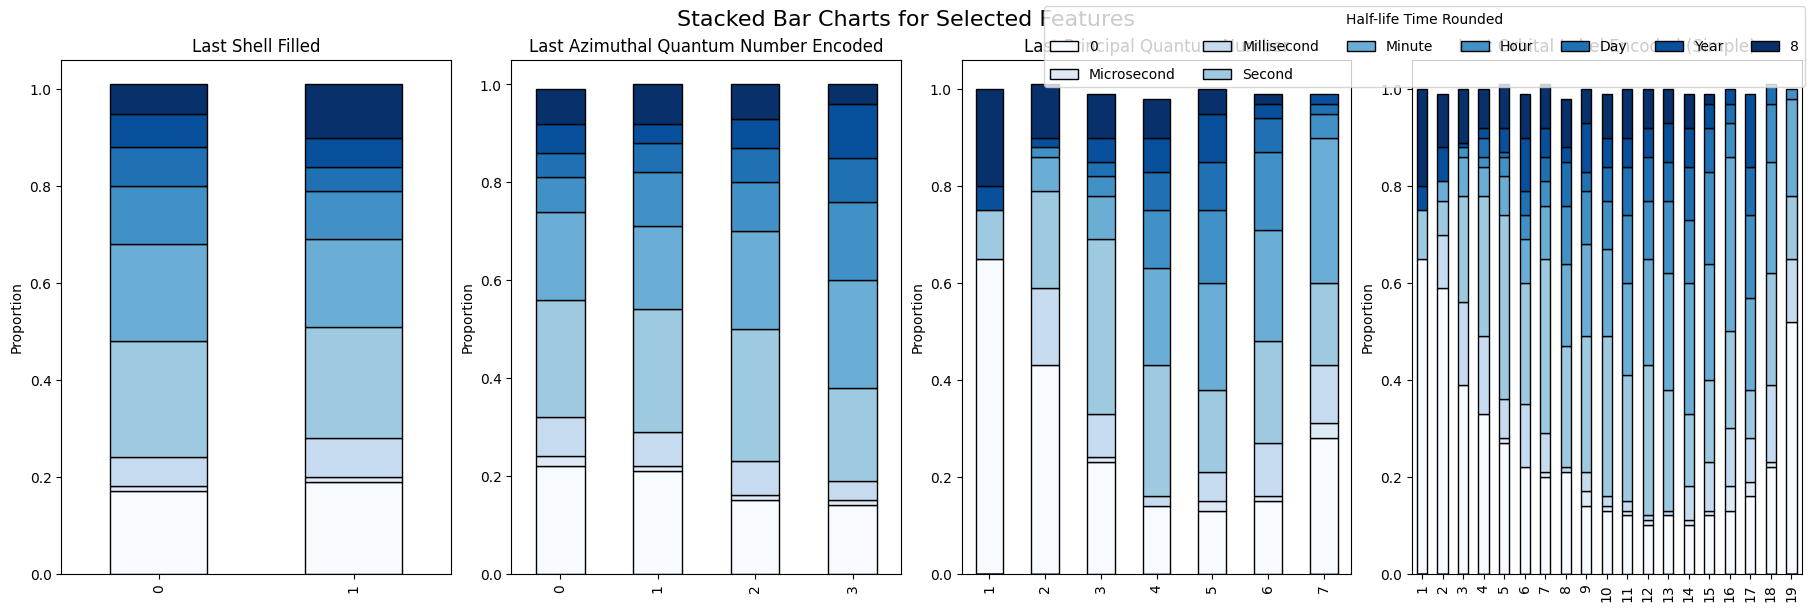

In [ ]:

from statsmodels.graphics.mosaicplot import mosaic


# List of features to analyze
#selected_features = ['Even Z', 'Even N', 'Even N-Z']
selected_features = ['Last Shell Filled', 'Last Azimuthal Quantum Number Encoded',
                     'Last Principal Quantum Number', 'Last Orbital Label Encoded (Simple)']
#selected_features = ['Is Magic Number', 'Magic Number', 'Closest Magic Number']

rounded_half_life_time = df['Half-life Time'].round(0).clip(0, 8)

# Initialize figure
fig, axes = plt.subplots(1, len(selected_features), figsize=(18, 6), constrained_layout=True)

# Define color palette for Stacked Bar Charts
palette = sns.color_palette("Blues", as_cmap=True)

# Time unit labels for the legend
time_units = {1: 'Microsecond', 2: 'Millisecond', 3: 'Second', 4: 'Minute', 5: 'Hour', 6: 'Day', 7: 'Year'}

# Loop through each selected feature to plot Stacked Bar Charts
for i, feature in enumerate(selected_features):
    ax = axes[i]

    # Create Stacked Bar Chart for each feature
    counts = pd.crosstab(df[feature], rounded_half_life_time).apply(lambda r: r/r.sum(), axis=1).round(2)
    counts.plot(kind='bar', stacked=True, ax=ax, cmap=palette, edgecolor='black')

    ax.set_title(f'{feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.get_legend().remove()

# Add a single legend for the entire figure
fig.legend([time_units.get(int(label), str(int(label))) for label in counts.columns],
           title='Half-life Time Rounded',
           labelspacing=1,
           ncol=len(time_units))

# Add a title for the entire figure
fig.suptitle('Stacked Bar Charts for Selected Features', fontsize=16)

plt.show()



Final Cleaning

In [30]:
transformation_features = ['Protons', 'Protons_log', 'Protons_reciprocal',
                           'Neutrons', 'Neutrons_log', 'Neutrons_reciprocal', 'Neutrons_power',
                           'Atomic Weight', 'Atomic Weight_log', 'Atomic Weight_reciprocal', 'Atomic Weight_power']

special_features = ['Abs(Z-N)/Atomic Weight', 'Abs(Z-N)/Atomic Weight_reciprocal',
                            'Z-N', 'Z-N_log', 'Z-N_reciprocal',
                            'Z/N', 'Z/N_power']

even_features = ['Even Z', 'Even N', 'Even N-Z']
chem_features = ['Last Shell Filled', 'Last Shell Fill Ratio', 'Last Orbital Label Encoded (Complex)', 'Last Orbital Label Encoded (Simple)',
                     'Last Principal Quantum Number', 'Last Azimuthal Quantum Number Encoded']
magic_features = ['Is Magic Number', 'Magic Number', 'Closest Magic Number', 'Distance To Magic Number', 'Distance To Magic Number_abs']


target_features = ['Half-life', 'Half-life Magnitude', 'Half-life Time', 'Artificial']

df.loc[:, transformation_features + special_features + even_features + chem_features + magic_features + target_features]

features_df = df.loc[:, transformation_features + special_features + even_features + chem_features + magic_features + target_features]
features_df.to_csv('nuclear_physics_features_df.csv')

In [31]:
features_df

,Protons,Protons_log,Protons_reciprocal,Neutrons,Neutrons_log,Neutrons_reciprocal,Neutrons_power,Atomic Weight,Atomic Weight_log,Atomic Weight_reciprocal,...,Last Azimuthal Quantum Number Encoded,Is Magic Number,Magic Number,Closest Magic Number,Distance To Magic Number,Distance To Magic Number_abs,Half-life,Half-life Magnitude,Half-life Time,Artificial
0,1,0.693147,1.000000,0,0.000000,0.000000,0,1.007825,0.697052,0.992236,...,0,False,0,2,-1,1,2.486929e+62,62.0,8.000000e+00,0
1,1,0.693147,1.000000,1,0.693147,1.000000,1,2.014102,1.103302,0.496499,...,0,False,0,2,-1,1,2.486929e+62,62.0,8.000000e+00,0
2,1,0.693147,1.000000,2,1.098612,0.500000,4,3.016049,1.390299,0.331560,...,0,False,0,2,-1,1,3.885728e+08,8.0,7.019868e+00,0
3,1,0.693147,1.000000,3,1.386294,0.333333,9,4.027806,1.614984,0.248274,...,0,False,0,2,-1,1,9.917391e-23,-23.0,9.917391e-17,0
4,1,0.693147,1.000000,4,1.609438,0.250000,16,5.035311,1.797627,0.198597,...,0,False,0,2,-1,1,8.003509e-23,-23.0,8.003509e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,114,4.744932,0.008772,169,5.135798,0.005917,28561,285.293680,5.657018,0.003505,...,1,False,0,126,-12,12,0.000000e+00,0.0,0.000000e+00,1
3613,115,4.753590,0.008696,170,5.141664,0.005882,28900,287.309620,5.664035,0.003481,...,1,False,0,126,-11,11,0.000000e+00,0.0,0.000000e+00,1
3614,116,4.762174,0.008621,171,5.147494,0.005848,29241,289.325560,5.671003,0.003456,...,1,False,0,126,-10,10,0.000000e+00,0.0,0.000000e+00,1
3615,117,4.770685,0.008547,172,5.153292,0.005814,29584,291.341500,5.677923,0.003432,...,1,False,0,126,-9,9,0.000000e+00,0.0,0.000000e+00,1


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image

# Define your feature categories
base_features = ['Protons', 'Neutrons', 'Atomic Weight']
transformation_features = ['Protons (Log)', 'Protons (Reciprocal)', 'Neutrons (Log)', 'Neutrons (Reciprocal)', 'Neutrons (Power)', 'Atomic Weight (Log)', 'Atomic Weight (Reciprocal)', 'Atomic Weight (Power)']
special_features = ['Abs(Z-N) / Atomic Weight', 'Abs(Z-N) / Atomic Weight (Reciprocal)', 'Z-N', 'Z-N (Log)', 'Z-N (Reciprocal)', 'Z/N', 'Z/N (Power)']
even_features = ['Even Z', 'Even N', 'Even N-Z']
chem_features = ['Last Shell Filled', 'Last Shell Fill Ratio', 'Last Orbital Label (Complex)', 'Last Orbital Label (Simple)', 'Last Principal Quantum Number', 'Last Azimuthal Quantum Number']
magic_features = ['Is Magic Number', 'Magic Number', 'Closest Magic Number', 'Distance to Magic Number', 'Absolute Distance to Magic Number']

# Combine all features into a single list
all_features = base_features + transformation_features + special_features + even_features + chem_features + magic_features

# Split the features into two columns
mid_idx = len(all_features) // 2
features_col1 = all_features[:mid_idx]
features_col2 = all_features[mid_idx:]

# Create a DataFrame with two columns
df = pd.DataFrame({'Final Features': features_col1, 'Final Features ': features_col2})

# Define color mapping for text
def color_map(val):
    if val in base_features:
        return 'color: #1E90FF'  # Dodger Blue
    elif val in transformation_features:
        return 'color: #4682B4'  # Steel Blue
    elif val in special_features:
        return 'color: #5F9EA0'  # Cadet Blue
    elif val in even_features:
        return 'color: #20B2AA'  # Light Sea Green
    elif val in chem_features:
        return 'color: #00CED1'  # Dark Turquoise
    elif val in magic_features:
        return 'color: #00BFFF'  # Deep Sky Blue
    else:
        return ''


# Define styles for left alignment and centering headers
table_styles = [
    {
        'selector': 'td',
        'props': [('text-align', 'left')]
    },
    {
        'selector': 'th',
        'props': [('text-align', 'center')]
    }
]

# Apply alternating row shading, text coloring, and other styles
styled_df = df.style.applymap(color_map).hide_index().set_table_styles(table_styles)

# Show the styled DataFrame
styled_df


<ipython-input-74-1f299fe0e161>:59: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_df = df.style.applymap(color_map).hide_index().set_table_styles(table_styles)


Final Features,Final Features
Protons,Z/N
Neutrons,Z/N (Power)
Atomic Weight,Even Z
Protons (Log),Even N
Protons (Reciprocal),Even N-Z
Neutrons (Log),Last Shell Filled
Neutrons (Reciprocal),Last Shell Fill Ratio
Neutrons (Power),Last Orbital Label (Complex)
Atomic Weight (Log),Last Orbital Label (Simple)
Atomic Weight (Reciprocal),Last Principal Quantum Number


In [71]:
pip install WeasyPrint


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.2 MB/s eta 0:00:00


In [73]:
from weasyprint import HTML

# ... (Your existing DataFrame and styling code here) ...

# Convert the styled DataFrame to HTML
html = styled_df.render()

# Create a WeasyPrint HTML object
html_obj = HTML(string=html)

# Write to a PDF file
html_obj.write_pdf("styled_dataframe.png")



<ipython-input-73-9e84a6836042>:6: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()
